In [45]:
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [46]:
data=data.rename({'Delivery Time':'Delivery'},axis=1)
data=data.rename({'Sorting Time':'Sorting'},axis=1)

In [47]:
data.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [49]:
data.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


C:\Users\SATHISH KUMAR K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

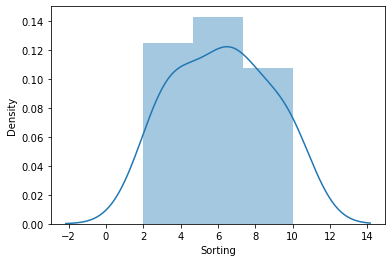

In [50]:
import seaborn as sns
sns.distplot(data['Sorting'])

C:\Users\SATHISH KUMAR K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

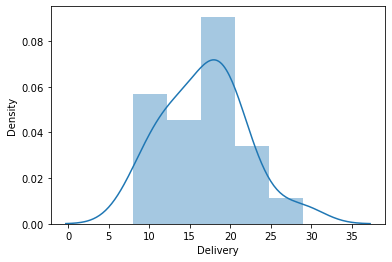

In [51]:
import seaborn as sns
sns.distplot(data['Delivery'])

<AxesSubplot:>

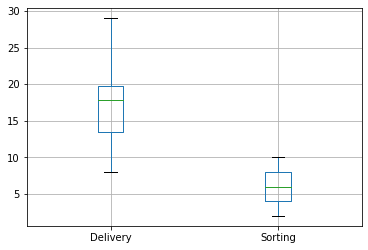

In [65]:
data.boxplot()

In [52]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery~Sorting",data = data).fit()

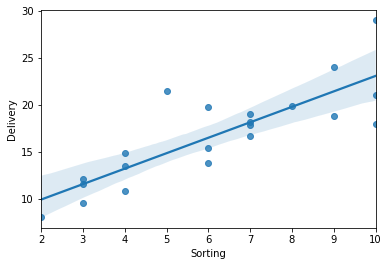

In [53]:
sns.regplot(x="Sorting", y="Delivery", data=data);

In [54]:
#Coefficients
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [56]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [57]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [58]:
#Predict Delivery time
newdata=pd.Series([5,10])

In [59]:
data_pred=pd.DataFrame(newdata,columns=['Sorting'])

In [60]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64